**Lab 1**

In [1]:
!pip install opencv-python

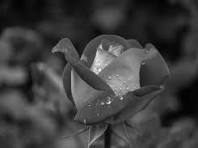

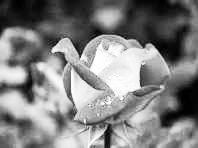

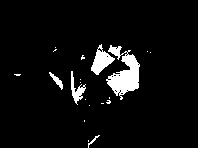

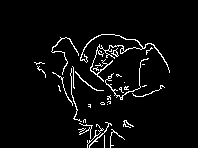

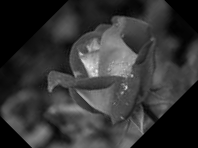

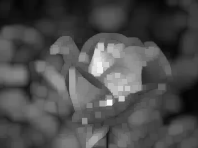

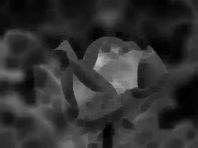

In [3]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


image = cv2.imread('/content/rose.jpeg', 0)  # Read the image in grayscale


equalized_image = cv2.equalizeHist(image)


_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)


edges = cv2.Canny(image, 100, 200)


rows, cols = image.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # Rotation matrix
augmented_image = cv2.warpAffine(image, M, (cols, rows))  # Apply rotation


kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(image, kernel, iterations=1)
eroded_image = cv2.erode(image, kernel, iterations=1)


cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(thresholded_image)
cv2_imshow(edges)
cv2_imshow(augmented_image)
cv2_imshow(dilated_image)
cv2_imshow(eroded_image)


**Lab 2**

In [ ]:
# @title Default title text
import numpy as np
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras import layers, models

# Load CIFAR-10 dataset

# Load in the data
data = tf.keras.datasets.cifar10


(X_train, y_train), (X_test, y_test) = data.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Reduce pixel values
X_train, X_test = X_train/ 255.0, X_test/ 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

# Reduce dataset size for quick testing
# Using 5000 for training and 1000 for testing as an example
X_train = X_train[:5000]
y_train = y_train[:5000]
X_test = X_test[:1000]
y_test = y_test[:1000]
X_train.shape



170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


(5000, 32, 32, 3)

**SVM and Softmax classifiers using KNN**

In [ ]:
# SVM classifier using KNN
svm_knn = SVC(kernel='linear')
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
svm_knn.fit(X_train_flat, y_train)
svm_knn_predictions = svm_knn.predict(X_test_flat)
print(svm_knn_predictions[:10])
svm_knn_accuracy = accuracy_score(y_test, svm_knn_predictions)
print("SVM classifier using KNN Accuracy:", svm_knn_accuracy)

# Softmax classifier using KNN
softmax_knn = KNeighborsClassifier(n_neighbors=10)  # You can tune n_neighbors
softmax_knn.fit(X_train_flat, y_train)
softmax_knn_predictions = softmax_knn.predict(X_test_flat)
softmax_knn_accuracy = accuracy_score(y_test, softmax_knn_predictions)
print("Softmax classifier using KNN Accuracy:", softmax_knn_accuracy)


[1 1 8 0 4 3 3 6 4 1]
SVM classifier using KNN Accuracy: 0.304
Softmax classifier using KNN Accuracy: 0.277


**SVM and Softmax classifiers using a 3-layer neural network**

In [ ]:
# SVM classifier using a 3-layer neural network
svm_nn = SVC(kernel='linear')
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
svm_nn.fit(X_train_flat, y_train)
svm_nn_predictions = svm_nn.predict(X_test_flat)
svm_nn_accuracy = accuracy_score(y_test, svm_nn_predictions)
print("SVM classifier using a 3-layer neural network Accuracy:", svm_nn_accuracy)

# Softmax classifier using a 3-layer neural network
softmax_nn = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

softmax_nn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history = softmax_nn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
_, softmax_nn_accuracy = softmax_nn.evaluate(X_test, y_test)
print("Softmax classifier using a 3-layer neural network Accuracy:", softmax_nn_accuracy)


SVM classifier using a 3-layer neural network Accuracy: 0.304
Epoch 1/10
79/79 [==============================] - 3s 7ms/step - loss: 2.2040 - accuracy: 0.1938 - val_loss: 2.0506 - val_accuracy: 0.2410
Epoch 2/10
79/79 [==============================] - 0s 4ms/step - loss: 1.9611 - accuracy: 0.2868 - val_loss: 1.9143 - val_accuracy: 0.3320
Epoch 3/10
79/79 [==============================] - 0s 4ms/step - loss: 1.8947 - accuracy: 0.3194 - val_loss: 1.8801 - val_accuracy: 0.3210
Epoch 4/10
79/79 [==============================] - 1s 7ms/step - loss: 1.8219 - accuracy: 0.3538 - val_loss: 1.9218 - val_accuracy: 0.3070
Epoch 5/10
79/79 [==============================] - 0s 5ms/step - loss: 1.8055 - accuracy: 0.3508 - val_loss: 1.8463 - val_accuracy: 0.3530
Epoch 6/10
79/79 [==============================] - 0s 5ms/step - loss: 1.7405 - accuracy: 0.3850 - val_loss: 1.7977 - val_accuracy: 0.3580
Epoch 7/10
79/79 [==============================] - 0s 5ms/step - loss: 1.7322 - accuracy: 0.3776 

**Lab 3**

**Normalization and drop out in neural network classifier**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model with Batch Normalization and Dropout
model = keras.Sequential([
    layers.Dense(64, input_dim=4, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/50
4/4 [==============================] - 4s 70ms/step - loss: 2.0573 - accuracy: 0.3148 - val_loss: 1.0244 - val_accuracy: 0.9167
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 1.4572 - accuracy: 0.3981 - val_loss: 0.9679 - val_accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 1.3530 - accuracy: 0.4722 - val_loss: 0.9165 - val_accuracy: 0.5833
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 1.0117 - accuracy: 0.5648 - val_loss: 0.8742 - val_accuracy: 0.5833
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.7447 - accuracy: 0.6759 - val_loss: 0.8377 - val_accuracy: 0.5833
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.7205 - accuracy: 0.7407 - val_loss: 0.8067 - val_accuracy: 0.5833
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.5411 - accuracy: 0.7685 - val_loss: 0.7790 - val_accuracy: 0.5833
Epoch 8/50
4/4 [===========